In [8]:
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sys import ps2
from utils import *

# Create accuracy dataframe

In [9]:
rls = [36,51,76]
tools = ['optitype','arcas','phlat','rna2hla','seq2hla','hlaforest','hlaminer']#hlaminer, hlahd missing ERR results; vbseq missing ALL results
gs = pd.read_csv('../datasets/readlength_gs.csv')

data = []

for tool in tools:
    for rl in rls:
        filepath = f'../results/read_length/standard/{tool}_{str(rl)}.csv'

        pre = pd.read_csv(filepath)
        ret = np.array(compute_matches(pre,gs))
        total = sum(sum(ret))
        # add 
        data.append([tool,rl,sum(ret[1])/total+sum(ret[2])/total,sum(ret[2])/total] ) # not considering classes (not enough data).. so sum it
    
print(data)

[['optitype', 36, 1.0, 1.0], ['optitype', 51, 1.0, 1.0], ['optitype', 76, 1.0, 1.0], ['arcas', 36, 0.9736842105263158, 0.7894736842105263], ['arcas', 51, 0.9523809523809523, 0.9047619047619048], ['arcas', 76, 0.98, 0.96], ['phlat', 36, 0.86, 0.62], ['phlat', 51, 0.8260869565217391, 0.7608695652173914], ['phlat', 76, 0.8846153846153847, 0.8653846153846154], ['rna2hla', 36, 0.7727272727272727, 0.6590909090909091], ['rna2hla', 51, 0.8571428571428571, 0.7857142857142857], ['rna2hla', 76, 0.8478260869565217, 0.8043478260869565], ['seq2hla', 36, 0.78, 0.54], ['seq2hla', 51, 0.86, 0.72], ['seq2hla', 76, 0.8518518518518519, 0.7222222222222222], ['hlaforest', 36, 0.6538461538461539, 0.5576923076923077], ['hlaforest', 51, 0.74, 0.58], ['hlaforest', 76, 0.76, 0.66], ['hlaminer', 36, 0.3333333333333333, 0.3333333333333333], ['hlaminer', 51, 0.16666666666666666, 0.0], ['hlaminer', 76, 0.6666666666666667, 0.25]]


In [10]:
# get means
short2, med2, long2 = 0,0,0
short4, med4, long4 = 0,0,0

tot = 7 # change to total # tools


for d in data:
    if d[1] == 36:
        short2 += d[2]/tot
        short4 += d[3]/tot
    if d[1] == 51:
        med2 += d[2]/tot
        med4 += d[3]/tot
    if d[1] == 76:
        long2 += d[2]/tot
        long4 += d[3]/tot

In [11]:
df = pd.DataFrame(data,columns=['tool','read length','two dig accuracy','four dig accuracy'])
print(df)


         tool  read length  two dig accuracy  four dig accuracy
0    optitype           36          1.000000           1.000000
1    optitype           51          1.000000           1.000000
2    optitype           76          1.000000           1.000000
3       arcas           36          0.973684           0.789474
4       arcas           51          0.952381           0.904762
5       arcas           76          0.980000           0.960000
6       phlat           36          0.860000           0.620000
7       phlat           51          0.826087           0.760870
8       phlat           76          0.884615           0.865385
9     rna2hla           36          0.772727           0.659091
10    rna2hla           51          0.857143           0.785714
11    rna2hla           76          0.847826           0.804348
12    seq2hla           36          0.780000           0.540000
13    seq2hla           51          0.860000           0.720000
14    seq2hla           76          0.85

# Plot

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
tool_names=tools

(0.0, 1.0)

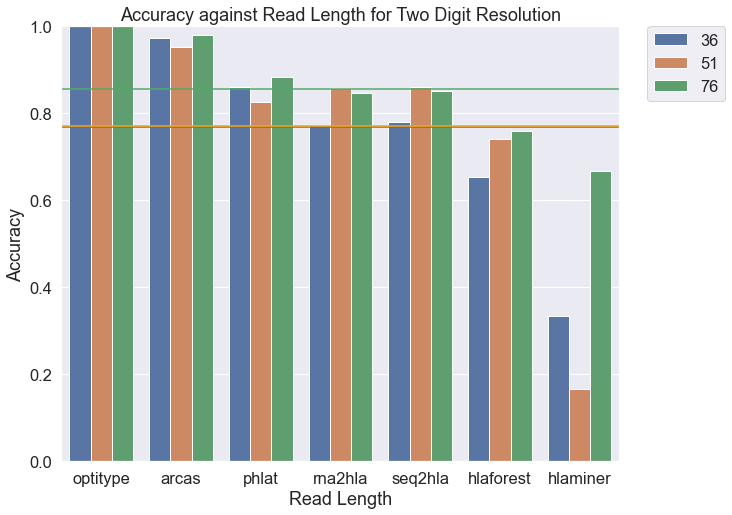

In [16]:
plt.figure(figsize=(10,8))

sns.set_context("paper")
sns.set(font_scale=1.5)

sns.color_palette("pastel")
ax=sns.barplot(x = "tool", y = "two dig accuracy", data=df,hue="read length")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy against Read Length for Two Digit Resolution") 


plt.axhline(y=short2, color='b', linestyle='-')
plt.axhline(y=med2, color='orange', linestyle='-')
plt.axhline(y=long2, color='g', linestyle='-')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_2dig.png',bbox_inches ="tight",dpi=300)

(0.0, 1.0)

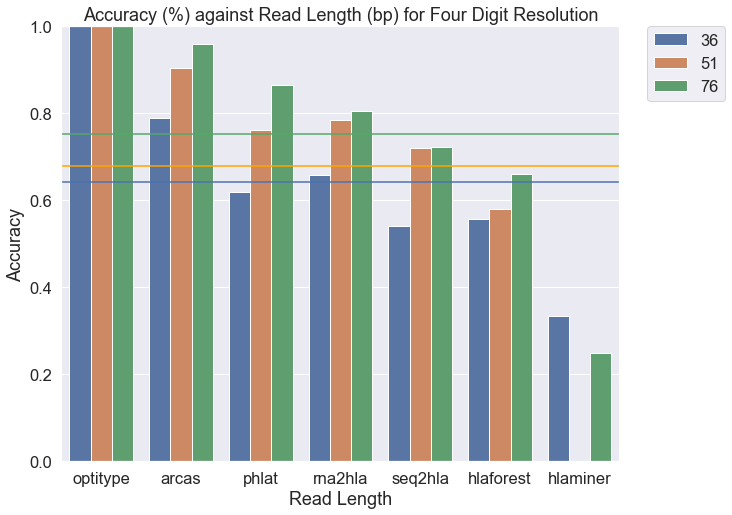

In [18]:
plt.figure(figsize=(10,8))
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(font_scale=1.5)


ax=sns.barplot(x = "tool", y = "four dig accuracy", data=df,hue="read length")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy (%) against Read Length (bp) for Four Digit Resolution") 

# annotate mean lines
plt.axhline(y=short4, color='b', linestyle='-')
plt.axhline(y=med4, color='orange', linestyle='-')
plt.axhline(y=long4, color='g', linestyle='-')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_4dig.png',bbox_inches ="tight",dpi=300)